<a href="https://colab.research.google.com/github/ankitajkit/Market-Index-Prediction/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv")

count     2667.000000
mean      8261.834986
std       2581.268450
min       4544.200195
25%       5817.650147
50%       8129.350098
75%      10471.750000
max      15314.700200
Name: Close, dtype: float64


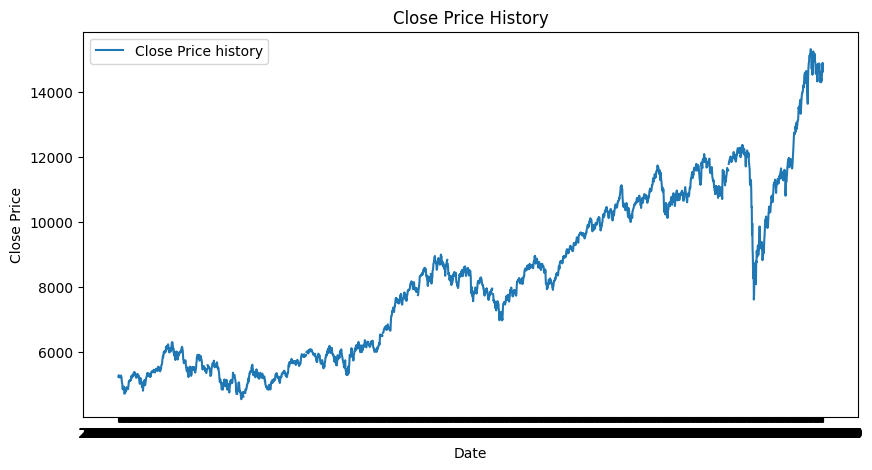

In [ ]:
import matplotlib.pyplot as plt
data_large=df
# Print some basic statistics about the data
print(data_large['Close'].describe())

# Plot the 'Close' prices over time
plt.figure(figsize=(10, 5))
plt.plot(data_large['Date'], data_large['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
data_large

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [ ]:
# Importing required libraries
from sklearn.preprocessing import MinMaxScaler
data_large = data_large.fillna(0)
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_large = scaler.fit_transform(data_large[['Close']])

# Splitting the data
train_size_large = int(len(scaled_data_large) * 0.80)
test_size_large = len(scaled_data_large) - train_size_large
train_large, test_large = scaled_data_large[0:train_size_large,:], scaled_data_large[train_size_large:len(scaled_data_large),:]

In [ ]:
import numpy as np

# Create a function to generate a dataset
def create_dataset(dataset, window_size):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return np.array(data_X), np.array(data_Y)

# Define your window size
window_size = 60

# Create train and test datasets
X_train_large, y_train_large = create_dataset(train_large, window_size)
X_test_large, y_test_large = create_dataset(test_large, window_size)

print('X_train_large shape:', X_train_large.shape)
print('X_test_large shape:', X_test_large.shape)


# Reshape the data to be 3D in the form expected by the LSTM layer
X_train_large = np.reshape(X_train_large, (X_train_large.shape[0], X_train_large.shape[1], 1))
X_test_large = np.reshape(X_test_large, (X_test_large.shape[0], X_test_large.shape[1], 1))

X_train_large shape: (2094, 60)
X_test_large shape: (478, 60)


In [ ]:
X_train_large

array([[[0.34164562],
        [0.34462966],
        [0.34488431],
        ...,
        [0.34274913],
        [0.3454524 ],
        [0.35053901]],

       [[0.34462966],
        [0.34488431],
        [0.34366328],
        ...,
        [0.3454524 ],
        [0.35053901],
        [0.35038231]],

       [[0.34488431],
        [0.34366328],
        [0.34246508],
        ...,
        [0.35053901],
        [0.35038231],
        [0.35094712]],

       ...,

       [[0.68382011],
        [0.68643198],
        [0.69114967],
        ...,
        [0.70880593],
        [0.70661518],
        [0.71087254]],

       [[0.68643198],
        [0.69114967],
        [0.68255008],
        ...,
        [0.70661518],
        [0.71087254],
        [0.71110108]],

       [[0.69114967],
        [0.68255008],
        [0.67278821],
        ...,
        [0.71087254],
        [0.71110108],
        [0.71207402]]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model_large = Sequential()

model_large.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_large.shape[1],1)))
model_large.add(Dropout(0.2))
model_large.add(LSTM(units=50, return_sequences=False))
model_large.add(Dropout(0.2))
model_large.add(Dense(units=25))
model_large.add(Dropout(0.2))
model_large.add(Dense(units=1))

model_large.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model_large.fit(X_train_large, y_train_large, epochs=20, batch_size=32)

Epoch 1/20
66/66 [==============================] - 15s 64ms/step - loss: 0.0262
Epoch 2/20
66/66 [==============================] - 4s 59ms/step - loss: 0.0089
Epoch 3/20
66/66 [==============================] - 5s 82ms/step - loss: 0.0074
Epoch 4/20
66/66 [==============================] - 4s 62ms/step - loss: 0.0071
Epoch 5/20
66/66 [==============================] - 4s 62ms/step - loss: 0.0062
Epoch 6/20
66/66 [==============================] - 5s 79ms/step - loss: 0.0059
Epoch 7/20
66/66 [==============================] - 4s 61ms/step - loss: 0.0057
Epoch 8/20
66/66 [==============================] - 4s 60ms/step - loss: 0.0054
Epoch 9/20
66/66 [==============================] - 5s 79ms/step - loss: 0.0053
Epoch 10/20
66/66 [==============================] - 4s 61ms/step - loss: 0.0051
Epoch 11/20
66/66 [==============================] - 4s 60ms/step - loss: 0.0050
Epoch 12/20
66/66 [==============================] - 5s 81ms/step - loss: 0.0048
Epoch 13/20
66/66 [=================

In [ ]:
# Making predictions
predictions_large = model_large.predict(X_test_large)

# Inverse transform the predicted data (because the original data was scaled)
predictions_large = scaler.inverse_transform(predictions_large)

# Compute the root mean squared error
rmse_large = np.sqrt(np.mean(((predictions_large - y_test_large) ** 2)))
print('Root Mean Squared Error:', rmse_large)

15/15 [==============================] - 1s 17ms/step
Root Mean Squared Error: 11350.11063754275


In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf

# Define the function for calculating SMA
def SMA(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

# Define the function for calculating EMA
def EMA(data, window_size):
    return data['Close'].ewm(span=window_size).mean()

# Define the function for calculating MACD
def MACD(data, short_window, long_window):
    short_EMA = EMA(data, short_window)
    long_EMA = EMA(data, long_window)
    return short_EMA - long_EMA
# Define the function for calculating RSI
def RSI(data, window_size):
    delta = data['Close'].diff()
    delta = delta[1:]
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ema_up = up.ewm(com=window_size-1 , min_periods=window_size).mean()
    ema_down = down.ewm(com=window_size-1 , min_periods=window_size).mean()
    return ema_up/ema_down

# Define the function for calculating Bollinger Bands
def Bollinger_Bands(data, window_size):
    middle_band = SMA(data, window_size)
    std_dev = data['Close'].rolling(window=window_size).std()
    upper_band = middle_band + (std_dev*2)
    lower_band = middle_band - (std_dev*2)
    return upper_band, lower_band
# Load the data
data_large = df

# Create features
data_large['SMA'] = SMA(data_large, 14)
data_large['EMA'] = EMA(data_large, 14)
data_large['MACD'] = MACD(data_large, 12, 26)
data_large['RSI'] = RSI(data_large, 14)
data_large['Upper_band'], data_large['Lower_band'] = Bollinger_Bands(data_large, 14)

# Print the first few rows of the data
print(data_large.head())

         Date         Open         High          Low        Close  \
0  2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195   
1  2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902   
2  2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805   
3  2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098   
4  2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000   

     Adj Close  Volume  SMA          EMA      MACD  RSI  Upper_band  \
0  5232.200195     0.0  NaN  5232.200195  0.000000  NaN         NaN   
1  5277.899902     0.0  NaN  5256.682181  1.025314  NaN         NaN   
2  5281.799805     0.0  NaN  5266.277199  1.427389  NaN         NaN   
3  5263.100098     0.0  NaN  5265.305234  0.900133  NaN         NaN   
4  5244.750000     0.0  NaN  5259.942405 -0.135512  NaN         NaN   

   Lower_band  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
data_large = data_large.dropna()
print(data_large.head())

          Date         Open         High          Low        Close  \
14  2010-01-22  5094.149902  5094.149902  4954.850098  5036.000000   
15  2010-01-25  5034.549805  5035.700195  4983.049805  5007.899902   
16  2010-01-27  5008.500000  5008.500000  4833.049805  4853.100098   
17  2010-01-28  4863.000000  4929.899902  4824.950195  4867.250000   
18  2010-01-29  4866.149902  4893.700195  4766.000000  4882.049805   

      Adj Close  Volume          SMA          EMA       MACD       RSI  \
14  5036.000000     0.0  5223.267857  5193.164367 -20.498781  0.261777   
15  5007.899902     0.0  5203.982143  5165.677905 -29.255828  0.234790   
16  4853.100098     0.0  5173.360735  5119.989505 -45.150952  0.145687   
17  4867.250000     0.0  5145.085728  5083.515536 -55.877615  0.183045   
18  4882.049805     0.0  5119.178571  5054.756917 -62.492116  0.225124   

     Upper_band   Lower_band  
14  5365.783564  5080.752150  
15  5383.040719  5024.923566  
16  5426.426034  4920.295436  
17  5439.9

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Exclude 'Date' column and scale all others
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA', 'EMA', 'MACD', 'RSI', 'Upper_band', 'Lower_band']

scaler = MinMaxScaler()

data_large_scaled = data_large.copy()
data_large_scaled[columns_to_scale] = scaler.fit_transform(data_large[columns_to_scale])
print(data_large_scaled.head())

          Date      Open      High       Low     Close  Adj Close  Volume  \
14  2010-01-22  0.043821  0.043576  0.039553  0.045662   0.045662     0.0   
15  2010-01-25  0.038276  0.038169  0.042185  0.043053   0.043053     0.0   
16  2010-01-27  0.035852  0.035652  0.028183  0.028680   0.028680     0.0   
17  2010-01-28  0.022315  0.028380  0.027427  0.029994   0.029994     0.0   
18  2010-01-29  0.022608  0.025031  0.021924  0.031368   0.031368     0.0   

         SMA       EMA      MACD       RSI  Upper_band  Lower_band  
14  0.042891  0.042934  0.726104  0.020645    0.038477    0.059019  
15  0.041020  0.040253  0.719650  0.015846    0.040056    0.053591  
16  0.038049  0.035798  0.707935  0.000000    0.044024    0.043418  
17  0.035306  0.032241  0.700029  0.006644    0.045263    0.036604  
18  0.032792  0.029437  0.695154  0.014127    0.045176    0.031658  


In [ ]:
# Function to create sequences of observations for each time step
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[(i+seq_length)]['Close']
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# Choose sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(data_large_scaled, seq_length)

In [ ]:
# Function to create sequences of observations for each time step
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[(i+seq_length)]['Close']
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# Choose sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(data_large_scaled, seq_length)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Assuming 'data_large_scaled' is your DataFrame, 'Close' is the column you want to predict and 'features' are the other columns

features = data_large_scaled.columns.drop(['Close', 'Date']) # 'Close' is your target column and 'Date' is to be excluded

X = data_large_scaled[features] # Features excluding 'Close' and 'Date'
y = data_large_scaled['Close'] # 'Close' is your target

# Convert the data to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshape the input data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

# Predict the future stock price
prediction = model.predict(X_test)

Epoch 1/100
55/55 [==============================] - 6s 27ms/step - loss: 0.0274
Epoch 2/100
55/55 [==============================] - 1s 22ms/step - loss: 0.0024
Epoch 3/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0022
Epoch 4/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0018
Epoch 5/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 6/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 7/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 8/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 9/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 10/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 11/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 12/100
55/55 [==============================] - 1s 15ms/step - loss: 9.9281e-04
Epoch 13/100
55/55 [=

19/19 [==============================] - 0s 7ms/step


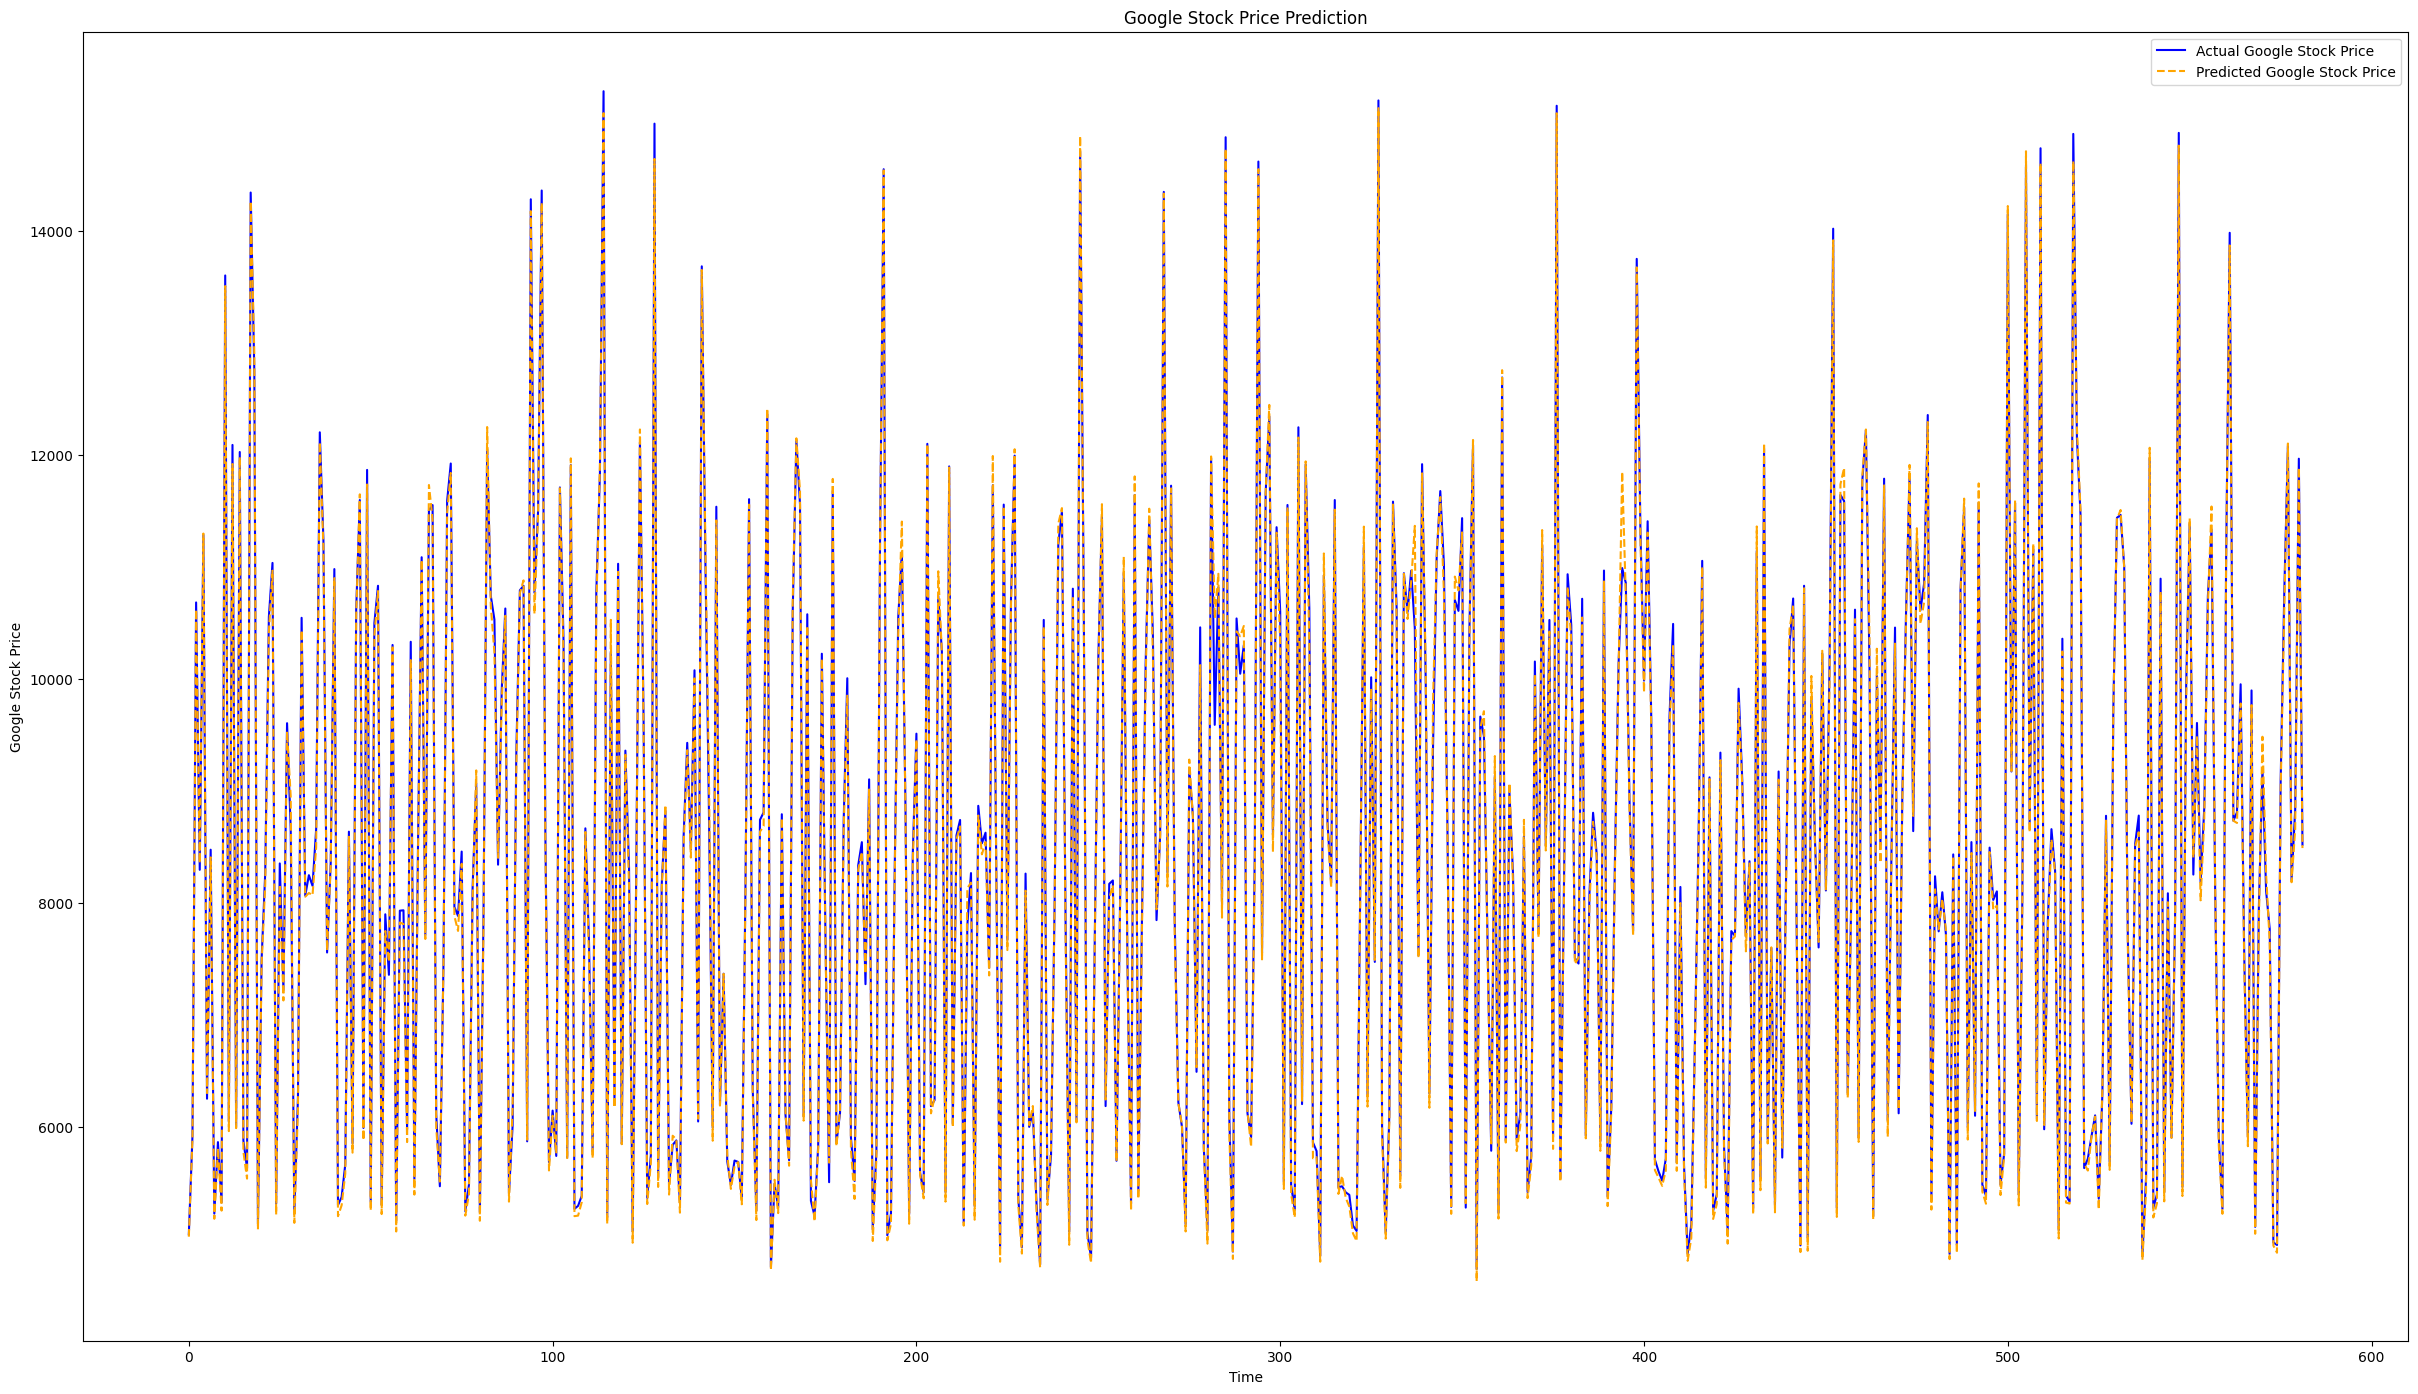

In [ ]:

close_scaler = MinMaxScaler()
close_scaler.fit(data_large[['Close']])

# Step 2: Get the model's predictions on the test data
predictions = model.predict(X_test)

# Step 3: Since our target variable was scaled using MinMaxScaler, we need to perform inverse transformation
predictions = close_scaler.inverse_transform(predictions)

# Step 4: Perform inverse scaling on y_test too, to bring it back to original scale for comparison
y_test_unscaled = close_scaler.inverse_transform(y_test.reshape(-1, 1))


# Step 5: Plotting the results
plt.figure(figsize=(30,17))
plt.plot(y_test_unscaled, color='blue', label='Actual Google Stock Price')
plt.plot(predictions , color='orange', label='Predicted Google Stock Price', linestyle='dashed')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_unscaled.reshape(-1), predictions.reshape(-1))

# Calculating Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test_unscaled.reshape(-1), predictions.reshape(-1)))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 89.49816949892606
Root Mean Squared Error: 122.67583878170363


In [ ]:
X_test.shape

(582, 11, 1)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close
    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')
    return pred_close


def predict_func(data):
    # Step 1: Data Preprocessing
    # Clean the data and handle missing values
    data = data.dropna()

    # Normalize the closing prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

    # Step 2: Feature Engineering
    # Select the relevant features (e.g., Close, Volume, High, Low)
    features = ['Close', 'Volume', 'High', 'Low','Open']
    X = data[features].values

    # Step 3: Train-Test Split
    X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)

    # Step 4: Create Sequences
    def create_sequences(data, window_size):
        X, y = [], []
        for i in range(len(data) - window_size - 2):
            window = data[i:(i + window_size)]
            target = data[i + window_size:(i + window_size + 2), 0]
            X.append(window)
            y.append(target)
        return np.array(X), np.array(y)

    window_size = 50
    X_train, y_train = create_sequences(X_train, window_size)

    # Step 5: Build and Train the LSTM Model
    model = Sequential()
    model.add(LSTM(64, input_shape=(window_size, len(features))))
    model.add(Dense(2))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Step 6: Make Predictions
    last_50_days = data.tail(window_size)[features].values
    last_50_days = last_50_days.reshape(1, window_size, len(features))
    predicted_values = model.predict(last_50_days)

    # Inverse transform the predicted values to their original scale
    predicted_values = scaler.inverse_transform(predicted_values)

    # Return the predicted closing prices for the next 2 days
    return [predicted_values[0][0], predicted_values[0][1]]


if __name__== "__main__":
    pred=evaluate()

<ipython-input-6-ba22f9ce27e4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
<ipython-input-6-ba22f9ce27e4>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


Epoch 1/50
67/67 [==============================] - 4s 23ms/step - loss: 0.0562
Epoch 2/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0270
Epoch 3/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0230
Epoch 4/50
67/67 [==============================] - 2s 35ms/step - loss: 0.0201
Epoch 5/50
67/67 [==============================] - 2s 29ms/step - loss: 0.0178
Epoch 6/50
67/67 [==============================] - 2s 24ms/step - loss: 0.0165
Epoch 7/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0155
Epoch 8/50
67/67 [==============================] - 2s 24ms/step - loss: 0.0149
Epoch 9/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0144
Epoch 10/50
67/67 [==============================] - 2s 23ms/step - loss: 0.0139
Epoch 11/50
67/67 [==============================] - 2s 28ms/step - loss: 0.0135
Epoch 12/50
67/67 [==============================] - 2s 36ms/step - loss: 0.0132
Epoch 13/50
67/67 [==================

In [ ]:
pred

array([7968.301, 7978.115], dtype=float32)

<Axes: >

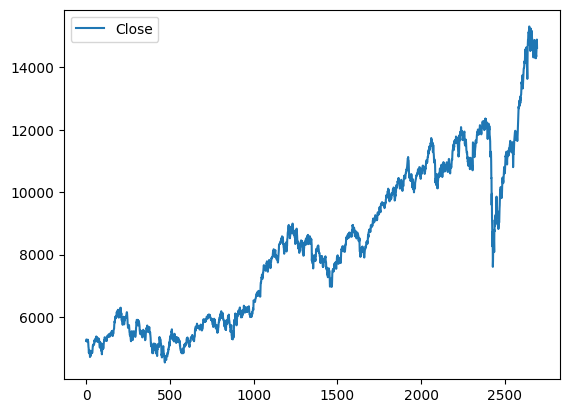

In [ ]:
df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')
df=df.dropna()
Close=df[['Close']]
Close.plot()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))


In [ ]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.75)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [ ]:
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 100 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)
X_train.shape,y_train.shape


((1949, 50), (1949,))

In [ ]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
X_train.shape

(1969, 50, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_8 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=50)

Epoch 1/20
98/98 [==============================] - 17s 109ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 2/20
98/98 [==============================] - 9s 92ms/step - loss: 3.5884e-04 - val_loss: 0.0028
Epoch 3/20
98/98 [==============================] - 8s 81ms/step - loss: 3.5779e-04 - val_loss: 0.0019
Epoch 4/20
98/98 [==============================] - 9s 92ms/step - loss: 3.5533e-04 - val_loss: 0.0019
Epoch 5/20
98/98 [==============================] - 9s 93ms/step - loss: 3.2006e-04 - val_loss: 0.0017
Epoch 6/20
98/98 [==============================] - 8s 85ms/step - loss: 2.9856e-04 - val_loss: 0.0014
Epoch 7/20
98/98 [==============================] - 10s 99ms/step - loss: 2.7371e-04 - val_loss: 0.0014
Epoch 8/20
98/98 [==============================] - 9s 95ms/step - loss: 2.5903e-04 - val_loss: 0.0012
Epoch 9/20
98/98 [==============================] - 9s 94ms/step - loss: 2.5180e-04 - val_loss: 0.0010
Epoch 10/20
98/98 [==============================] - 8s 84ms/step - loss: 

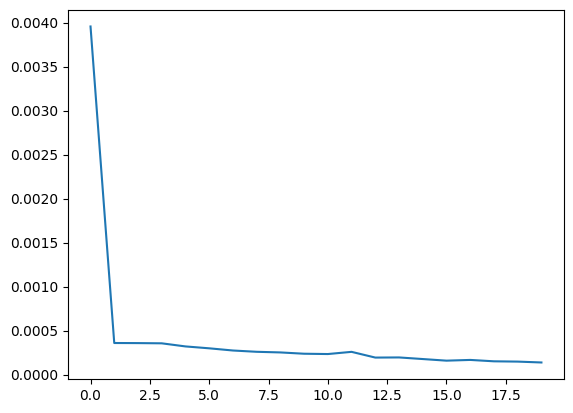

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
import matplotlib.pyplot as plt

loss = model.history.history['loss']
plt.plot(loss)

20/20 [==============================] - 1s 25ms/step


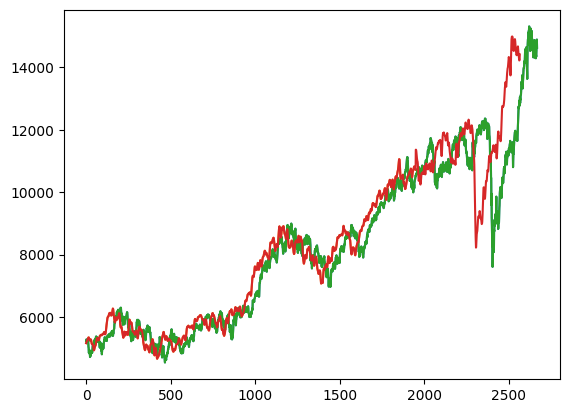

In [ ]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
test = np.vstack((train_predict,test_predict))
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [ ]:
len(ds_test)


667

In [ ]:
#Getting the last 100 days records
fut_inp = ds_test[615:665]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
#Creating list of the last 50 data
tmp_inp = tmp_inp[0].tolist()

In [ ]:
fut_inp.shape

(1, 50)

In [ ]:
#Predicting next 2 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=50
i=0
while(i<2):
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        fut_inp = np.array(tmp_inp[1:])
print(lst_output)

[[0.9167123436927795], [0.9215080142021179]]


In [ ]:
len(tmp_inp)

52

In [ ]:
x=normalizer.inverse_transform(lst_output)
y=np.zeros(2)
y[0]=x[0][0]
y[1]=x[1][0]

In [ ]:
actual_close = np.loadtxt('sample_close.txt')

pred_close = y

    # Calculation of squared_error
actual_close = np.array(actual_close)
pred_close = np.array(pred_close)
mean_square_error = np.mean(np.square(actual_close-pred_close))


pred_prev = [df['Close'].iloc[-1]]
pred_prev.append(pred_close[0])
pred_curr = pred_close

actual_prev = [df['Close'].iloc[-1]]
actual_prev.append(actual_close[0])
actual_curr = actual_close

    # Calculation of directional_accuracy
pred_dir = np.array(pred_curr)-np.array(pred_prev)
actual_dir = np.array(actual_curr)-np.array(actual_prev)
dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')

Mean Square Error: 126972.920199
Directional Accuracy: 0.0


In [ ]:
actual_close

array([14894.90039, 14631.09961])

In [ ]:
y

array([14417.65049733, 14469.30226657])

In [ ]:
x[1][0]

14469.302266571449

In [ ]:
x[0][0]

14417.650497326642

### MAIN CODE ###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense

from scipy.stats import mstats
df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')
df = df.interpolate(method='linear')  #adding missing data
Close=df[['Close']]
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step:i+step+2, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 100 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout, Bidirectional
#Creating LSTM model using keras
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=2, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,352
Trainable params: 23,352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.type()

AttributeError: ignored

In [ ]:
import numpy as np

def custom_loss(y_true, y_pred):
    # Extract the "next day's price" of array
    y_true_next = y_true[1:]
    y_pred_next = y_pred[1:]

    # Extract the "today's price" of array
    y_true_tdy = y_true[:-1]
    y_pred_tdy = y_pred[:-1]

    print('Shape of y_pred_back -', y_pred_tdy.shape)

    # Subtract to get up/down movement of the two arrays
    y_true_diff = y_true_next - y_true_tdy
    y_pred_diff = y_pred_next - y_pred_tdy

    # Create a standard array with zero value for comparison
    standard = np.zeros_like(y_pred_diff)

    # Compare with the standard; if true, UP; else DOWN
    y_true_move = np.greater_equal(y_true_diff, standard)
    y_pred_move = np.greater_equal(y_pred_diff, standard)
    y_true_move = y_true_move.flatten()
    y_pred_move = y_pred_move.flatten()

    # Find indices where the directions are not the same
    indices = np.where(y_true_move != y_pred_move)[0]

    # Move one position later
    indices += 1

    # Create an array to store directional loss and put it into custom loss output
    direction_loss = np.ones_like(y_pred, dtype=np.float32)
    alpha = 1000
    direction_loss[indices] = alpha

    custom_loss = np.mean(np.multiply(np.square(y_true - y_pred), direction_loss), axis=-1)

    return custom_loss


# Create the LSTM model with custom loss function
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=2, activation='linear'))
model.compile(loss=custom_loss, optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
Shape of y_pred_back - (None, 50, 2)


NotImplementedError: ignored

In [ ]:
tf.multiply(y_true, y_pred)

NameError: ignored

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=200, batch_size=32)


Epoch 1/200
58/58 [==============================] - 9s 80ms/step - loss: 0.0089
Epoch 2/200
58/58 [==============================] - 3s 59ms/step - loss: 1.4931e-04
Epoch 3/200
58/58 [==============================] - 3s 59ms/step - loss: 1.2644e-04
Epoch 4/200
58/58 [==============================] - 4s 78ms/step - loss: 1.2419e-04
Epoch 5/200
58/58 [==============================] - 4s 60ms/step - loss: 1.1953e-04
Epoch 6/200
58/58 [==============================] - 3s 59ms/step - loss: 1.2191e-04
Epoch 7/200
58/58 [==============================] - 3s 59ms/step - loss: 1.1075e-04
Epoch 8/200
58/58 [==============================] - 5s 80ms/step - loss: 1.1115e-04
Epoch 9/200
58/58 [==============================] - 3s 59ms/step - loss: 1.0511e-04
Epoch 10/200
58/58 [==============================] - 3s 58ms/step - loss: 9.9783e-05
Epoch 11/200
58/58 [==============================] - 5s 80ms/step - loss: 9.9201e-05
Epoch 12/200
16/58 [=======>......................] - ETA: 2s - los

KeyboardInterrupt: ignored

In [ ]:
model.save("trained_model.h5")


In [ ]:

# Step 2: Get the model's predictions on the test data
predictions = model.predict(X_test)

predictions=normalizer.inverse_transform(predictions)
# Step 4: Perform inverse scaling on y_test too, to bring it back to original scale for comparison
y_tests = normalizer.inverse_transform(y_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
rmse = mean_squared_error(y_tests.reshape(-1), predictions.reshape(-1))
directional_accuracy = np.mean(np.sign(y_tests[1:] - y_tests[:-1]) == np.sign(predictions[1:] - predictions[:-1])) * 100

# Print directional accuracy
print("Directional Accuracy:", directional_accuracy)

print("Mean Squared Error:", rmse)

24/24 [==============================] - 0s 15ms/step
Directional Accuracy: 52.70805812417437
Mean Squared Error: 36794.103049224366


In [ ]:
y_tests.shape

(758, 2)

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_27 (LSTM)              (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30,702
Trainable params: 30,702
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/trained_model (4).h5")
df=pd.read_csv("/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv")
df = df.interpolate(method='linear')
Close=df[['Close']]
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))
#Getting the last 100 days records



In [ ]:
#Getting the last 100 days records
fut_inp = ds_scaled[1600:1650]
fut_inp = fut_inp.reshape(1,-1)
fut_inp = fut_inp.reshape((1, 50,1))
yhat = model.predict(fut_inp, verbose=0)
pred_close=normalizer.inverse_transform(yhat)
actual_close = np.loadtxt('sample_close.txt')
actual_close = ds[1650:1652]

    # Calculation of squared_error
actual_close = np.array(actual_close)
pred_close = np.array(pred_close)
mean_square_error = np.mean(np.square(actual_close-pred_close))
y=np.zeros(2)
y[0]=pred_close[0][0]
y[1]=pred_close[0][1]
pred_close=y
pred_prev = [df['Close'].iloc[-1]]
pred_prev.append(pred_close[0])
pred_curr = pred_close

    # Calculation of directional_accuracy
pred_dir = np.array(pred_curr)-np.array(pred_prev)
actual_dir = np.array(actual_curr)-np.array(actual_prev)
dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')

NameError: ignored

In [ ]:
pred_dir

array([-6530.771485  ,    27.04980469])

In [ ]:
actual_dir

array([[-6369.349609999999, array([0.])],
       [-6460.299805, array([-90.950195])]], dtype=object)

In [ ]:
ds[1649]

array([8143.149902])

In [ ]:
pred_close

array([8100.328125  , 8127.37792969])

In [ ]:
actual_close

array([[8261.75    ],
       [8170.799805]])

In [ ]:
fut_inp.shape

(1, 50, 1)

In [ ]:
actual_close

array([7232.200195, 7277.899902])

In [ ]:
pred_close


array([7195.87892519, 7154.86928988])

In [ ]:

ds[49]

array([5198.100098])

In [ ]:
actual_close

array([7232.200195, 7277.899902])

In [ ]:
pred_close[0][0]

7108.5757

In [ ]:
actual_close

array([7232.200195, 7277.899902])

In [ ]:
data_large.shape

(2325, 13)

In [ ]:
# Function to create sequences of observations for each time step
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data) - seq_length - 1):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[(i+seq_length)]['Close']
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# Choose sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(data_large_scaled, seq_length)

In [ ]:
# Step 1: Define a new scaler for the 'Close' prices
close_scaler = MinMaxScaler()
close_scaler.fit(data[['Close']])

# Step 2: Get the model's predictions on the test data
predictions = model.predict(X_test)

# Step 3: Since our target variable was scaled using MinMaxScaler, we need to perform inverse transformation
predictions = close_scaler.inverse_transform(predictions)

# Step 4: Perform inverse scaling on y_test too, to bring it back to original scale for comparison
y_test_unscaled = close_scaler.inverse_transform(y_test.reshape(-1, 1))



19/19 [==============================] - 0s 5ms/step


In [ ]:
X_test.shape

(582, 11, 1)

In [ ]:
predictions.shape

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    """
    Modify this function to predict closing prices for next 2 samples.
    Take care of null values in the sample_input.csv file which are listed as NAN in the dataframe passed to you
    Args:
        data (pandas Dataframe): contains the 50 continuous time series values for a stock index

    Returns:
        list (2 values): your prediction for closing price of next 2 samples
    """
    # Load the saved model
    model = load_model("/content/trained_model (6).h5")
    df =pd.read_csv("/content/sample_input.csv")

    df = df.interpolate(method='linear')
    Close=df[['Close']]
    ds = Close.values

    #Using MinMaxScaler for normalizing data between 0 & 1
    normalizer = MinMaxScaler(feature_range=(0,1))
    ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

    fut_inp = ds_scaled
    fut_inp = fut_inp.reshape(1,-1)
    tmp_inp = list(fut_inp)
    #Creating list of the last 50 data
    tmp_inp = tmp_inp[0].tolist()


    #Predicting next 2 days price suing the current data
    lst_output=[]
    i=0

    while(i<2):
        fut_inp = fut_inp.reshape((1, 50,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
        fut_inp = np.array(tmp_inp[1:])
    x=normalizer.inverse_transform(lst_output)
    y=np.zeros(2)
    y[0]=x[0][0]
    y[1]=x[1][0]
    return y

if __name__== "__main__":
    evaluate()

Mean Square Error: 3976.083095
Directional Accuracy: 50.0


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    """
    Modify this function to predict closing prices for next 2 samples.
    Take care of null values in the sample_input.csv file which are listed as NAN in the dataframe passed to you
    Args:
        data (pandas Dataframe): contains the 50 continuous time series values for a stock index

    Returns:
        list (2 values): your prediction for closing price of next 2 samples
    """
    # Load the saved model
    model = load_model('LSTM_model.h5')

    # Handling Na values
    data = data.interpolate(method='linear')

    #Extracting Close column from DataFrame
    Close = data[['Close']]
    arr_Close = Close.values

    #Using MinMaxScaler for normalizing data between 0 & 1
    normalizer = MinMaxScaler(feature_range=(0,1))
    arr_Close_scaled = normalizer.fit_transform(np.array(arr_Close).reshape(-1,1))

    # Rearranging data in input formate
    x_inp = arr_Close_scaled
    x_inp = x_inp.reshape(1,-1)

    # Hanling 2 days prediction
    tmp_inp = list(x_inp)
    tmp_inp = tmp_inp[0].tolist()

    #Predicting next 2 days Closing price
    lst_output=[]
    i=0
    while(i<2):
        x_inp = x_inp.reshape((1, 50,1))
        y_pred = model.predict(x_inp, verbose=0)
        tmp_inp.extend(y_pred[0].tolist())
        lst_output.extend(y_pred.tolist())
        i=i+1
        x_inp = np.array(tmp_inp[1:])
    y_pred_rescaled = normalizer.inverse_transform(lst_output)
    y_pred = np.zeros(2)

    # Reformating the shape
    y_pred[0] = y_pred_rescaled[0][0]
    y_pred[1] = y_pred_rescaled[1][0]

    return y_pred

if __name__== "__main__":
    evaluate()

Mean Square Error: 3976.083095
Directional Accuracy: 50.0


In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler


def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))

    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir) > 0)*100

    print(
        f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    # Loading the model and the nan values interpolated values file
    model = load_model('saving_gru33(50_64).h5')


    # Linear interpolation for remaining NaN values
    data['Close'].interpolate(method='linear', inplace=True)
    scaler = MinMaxScaler()
    # Fitting the scaler with training data
    scaler.fit(data['Close'].values.reshape(-1, 1))

    scaled_data = scaler.transform(data['Close'].values.reshape(-1, 1))

    sequence_length = 50
    sequence = scaled_data[-sequence_length:]

    sequence = sequence.reshape(1, sequence_length, 1)

    predictions = []
    weekdays_to_predict = 2
    while weekdays_to_predict > 0:
        next_pred = model.predict(sequence)
        next_pred_price = scaler.inverse_transform(next_pred)[0][0]

        # Skip weekends (Saturday and Sunday)
        next_day = pd.Timestamp(data['Date'].iloc[-1]) + pd.Timedelta(days=1)
        if next_day.dayofweek < 5:  # Check if the next day is a weekday
            predictions.append(next_pred_price)
            weekdays_to_predict -= 1

        sequence = np.concatenate(
            (sequence[:, 1:, :], next_pred.reshape(1, 2, 1)), axis=1)

    # Return the predicted(a list) closing prices for the next two days
    return predictions


if __name__ == "__main__":
    evaluate()


1/1 [==============================] - 1s 681ms/step
Mean Square Error: 217.634668
Directional Accuracy: 100.0


In [41]:
model=load_model('saving_gru33(50_64).h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 50, 128)           50304     
                                                                 
 gru_8 (GRU)                 (None, 50, 128)           99072     
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 248,706
Trainable params: 248,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
data = pd.read_csv('sample_input.csv')
data['Close'].interpolate(method='linear', inplace=True)
scaler = MinMaxScaler()
# Fitting the scaler with training data
scaler.fit(data['Close'].values.reshape(-1, 1))

scaled_data = scaler.transform(data['Close'].values.reshape(-1, 1))

sequence_length = 50
sequence = scaled_data[-sequence_length:]

sequence = sequence.reshape(1, sequence_length, 1)
data = data.interpolate(method='linear')

    #Extracting Close column from DataFrame
Close = data[['Close']]
arr_Close = Close.values

    #Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
arr_Close_scaled = normalizer.fit_transform(np.array(arr_Close).reshape(-1,1))

    # Rearranging data in input formate
x_inp = arr_Close_scaled
x_inp = x_inp.reshape(1,-1)
x_inp = x_inp.reshape((1, 50,1))
y_pred = model.predict(x_inp, verbose=0)

y_pred = model.predict(x_inp, verbose=0)
y_pred_rescaled = normalizer.inverse_transform(y_pred)


In [25]:
y_pred_rescaled


array([[7242.3223, 7249.243 ]], dtype=float32)

In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    """
    Modify this function to predict closing prices for next 2 samples.
    Take care of null values in the sample_input.csv file which are listed as NAN in the dataframe passed to you
    Args:
        data (pandas Dataframe): contains the 50 continuous time series values for a stock index

    Returns:
        list (2 values): your prediction for closing price of next 2 samples
    """
    # Load the saved model
    model = load_model('/content/saving_gru33(50_64).h5')

    # Handling Na values
    data = data.interpolate(method='linear')

    #Extracting Close column from DataFrame
    Close = data[['Close']]
    arr_Close = Close.values

    #Using MinMaxScaler for normalizing data between 0 & 1
    normalizer = MinMaxScaler(feature_range=(0,1))
    arr_Close_scaled = normalizer.fit_transform(np.array(arr_Close).reshape(-1,1))

    # Rearranging data in input formate
    x_inp = arr_Close_scaled
    x_inp = x_inp.reshape(1,-1)

    # Hanling 2 days prediction
    tmp_inp = list(x_inp)
    tmp_inp = tmp_inp[0].tolist()

    #Predicting next 2 days Closing price
    lst_output=[]
    i=0

    x_inp = x_inp.reshape((1, 50,1))
    y_pred = model.predict(x_inp, verbose=0)
    y_pred_rescaled = normalizer.inverse_transform(y_pred)
    y_pred = np.zeros(2)

    # Reformating the shape
    y_pred[0] = y_pred_rescaled[0][0]
    y_pred[1] = y_pred_rescaled[0][1]

    return y_pred

if __name__== "__main__":
    evaluate()

Mean Square Error: 461.832471
Directional Accuracy: 100.0


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import GRU, Dense

from scipy.stats import mstats
df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')
df = df.interpolate(method='linear')  #adding missing data
Close=df[['Close']]
df['Close'] = df['Close'].interpolate(method='linear')

# Convert the 'Close' column to a NumPy array
close_prices = df['Close'].values

# Apply moving average smoothing
window_size = 15
Close = np.convolve(close_prices, np.ones(window_size)/window_size, mode='valid')



import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

#Using MinMaxScaler for normalizing data between 0 & 1
normalizer1 = MinMaxScaler(feature_range=(0,1))
close_prices_scaled = normalizer1.fit_transform(np.array(close_prices ).reshape(-1,1))



#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.7)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[100:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
ds_tr,ds_te=close_prices_scaled[100:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 100 days price as one record for training
time_stamp = 50
x,y=create_ds(ds_tr,time_stamp)
x1,y1=create_ds(ds_te,time_stamp)
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout, Bidirectional
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

NameError: ignored

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense

from scipy.stats import mstats
df = pd.read_csv('/content/0f411c708e55af442eafb33bfb7ee7585f5b0211a52d9ccc4287a23d8d6abe76_STOCK_INDEX.csv')
df = df.interpolate(method='linear')  #adding missing data
Close=df[['Close']]
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step:i+step+2, 0])
    return np.array(Xtrain), np.array(Ytrain)
#Taking 100 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout, Bidirectional
#Creating LSTM model using keras
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=2, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 50, 50)            7950      
                                                                 
 gru_3 (GRU)                 (None, 50)                15300     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,352
Trainable params: 23,352
Non-trainable params: 0
_________________________________________________________________


In [36]:
y_test

array([[0.55719788, 0.5485446 ],
       [0.5485446 , 0.54168332],
       [0.54168332, 0.54001209],
       ...,
       [0.93856828, 0.95820525],
       [0.95820525, 0.96102318],
       [0.96102318, 0.93653028]])

In [38]:
y_test.reshape(-1,2)

array([[0.55719788, 0.5485446 ],
       [0.5485446 , 0.54168332],
       [0.54168332, 0.54001209],
       ...,
       [0.93856828, 0.95820525],
       [0.95820525, 0.96102318],
       [0.96102318, 0.93653028]])

In [42]:

# Step 2: Get the model's predictions on the test data
predictions = model.predict(X_test)

predictions=normalizer.inverse_transform(predictions)
# Step 4: Perform inverse scaling on y_test too, to bring it back to original scale for comparison
y_tests = normalizer.inverse_transform(y_test.reshape(-1,2))
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_tests.reshape(-1), predictions.reshape(-1))
directional_accuracy = np.mean(np.sign(y_tests[1:] - y_tests[:-1]) == np.sign(predictions[1:] - predictions[:-1])) * 100

# Print directional accuracy
print("Directional Accuracy:", directional_accuracy)

print("Mean Squared Error:", mse)

24/24 [==============================] - 1s 28ms/step
Directional Accuracy: 52.90620871862616
Mean Squared Error: 42284.729940272475


In [43]:
predictions

array([[10621.42  , 10534.983 ],
       [10644.263 , 10557.323 ],
       [10599.598 , 10513.288 ],
       ...,
       [14553.675 , 14498.897 ],
       [14697.9795, 14655.936 ],
       [14887.989 , 14860.843 ]], dtype=float32)

In [44]:
y_tests

array([[10545.5    , 10452.29981],
       [10452.29981, 10378.40039],
       [10378.40039, 10360.40039],
       ...,
       [14653.04981, 14864.54981],
       [14864.54981, 14894.90039],
       [14894.90039, 14631.09961]])

In [34]:
from tensorflow.keras.models import load_model

# Load the saved model
#model = load_model("/content/best_lstm_model.h5")
df=pd.read_csv("/content/sample_input.csv")
df = df.interpolate(method='linear')
Close=df[['Close']]
ds = Close.values
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,0.8))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))
#Getting the last 100 days records


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

def evaluate():
    # Input the csv file
    """
    Sample evaluation function
    Don't modify this function
    """
    df = pd.read_csv('sample_input.csv')

    actual_close = np.loadtxt('sample_close.txt')

    pred_close = predict_func(df)

    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-1]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close

    actual_prev = [df['Close'].iloc[-1]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')


def predict_func(data):
    """
    Modify this function to predict closing prices for next 2 samples.
    Take care of null values in the sample_input.csv file which are listed as NAN in the dataframe passed to you
    Args:
        data (pandas Dataframe): contains the 50 continuous time series values for a stock index

    Returns:
        list (2 values): your prediction for closing price of next 2 samples
    """
    # Load the saved model

    # Handling Na values
    data = data.interpolate(method='linear')

    #Extracting Close column from DataFrame
    Close = data[['Close']]
    arr_Close = Close.values
    window_size = 7
    arr_Close = np.convolve(arr_Close, np.ones(window_size)/window_size, mode='valid')
    #Using MinMaxScaler for normalizing data between 0 & 1
    normalizer = MinMaxScaler(feature_range=(0,1))
    arr_Close_scaled = normalizer.fit_transform(np.array(arr_Close).reshape(-1,1))

    # Rearranging data in input formate
    x_inp = arr_Close_scaled
    x_inp = x_inp.reshape(1,-1)

    # Hanling 2 days prediction
    tmp_inp = list(x_inp)
    tmp_inp = tmp_inp[0].tolist()

    #Predicting next 2 days Closing price
    lst_output=[]
    i=0
    while(i<2):
        x_inp = x_inp.reshape((1, 50,1))
        y_pred = model.predict(x_inp, verbose=0)
        tmp_inp.extend(y_pred[0].tolist())
        lst_output.extend(y_pred.tolist())
        i=i+1
        x_inp = np.array(tmp_inp[1:])
    y_pred_rescaled = normalizer.inverse_transform(lst_output)
    y_pred = np.zeros(2)

    # Reformating the shape
    y_pred[0] = y_pred_rescaled[0][0]
    y_pred[1] = y_pred_rescaled[1][0]

    return y_pred

if __name__== "__main__":
    evaluate()

ValueError: ignored